In [1]:
!pip install kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download kmader/skin-cancer-mnist-ham10000/
!unzip skin-cancer-mnist-ham10000

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: ham10000_images_part_2/ISIC_0029342.jpg  
  inflating: h

In [3]:
!pip install opencv-python
!pip install keras
!pip install tensorflow

In [4]:
import numpy as np
import seaborn as sns;sns.set(style="white")
import matplotlib.pyplot as plt
%matplotlib inline
import os
import random
import cv2
from PIL import Image
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:

import keras
from keras.models import Sequential

from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten,BatchNormalization,Conv2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn import preprocessing
from keras.utils import to_categorical
import warnings
warnings.simplefilter("ignore")

In [7]:
import pandas as pd
meta = pd.read_csv("/content/HAM10000_metadata.csv")
meta.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [8]:
meta['age'].fillna((meta['age'].mean()), inplace=True)

In [ ]:
print("HAM10000_images_part_1 folder have {} images.".format(len(os.listdir("/content/HAM10000_images_part_1"))))
print("HAM10000_images_part_2 folder have {} images.".format(len(os.listdir("/content/HAM10000_images_part_2"))))

In [9]:
nv_ls=[]
mel_ls=[]
bkl_ls=[]
bcc_ls=[]
akiec_ls=[]
vasc_ls=[]
df_ls=[]

for i in os.listdir("/content/HAM10000_images_part_1"):
  try:
    image = cv2.imread("/content/HAM10000_images_part_1/"+i)
    image_array = Image.fromarray(image , 'RGB')
    resize_img = image_array.resize((50 , 50))
    dx = meta.loc[meta["image_id"]==i.split(".")[0], "dx"].values[0]

    if dx == "nv":
      nv_ls.append(resize_img)
    elif dx == "mel":
      mel_ls.append(resize_img)
    elif dx == "bkl":
      bkl_ls.append(resize_img)
    elif dx == "bcc":
      bcc_ls.append(resize_img)
    elif dx == "akiec":
      akiec_ls.append(resize_img)
    elif dx == "vasc":
      vasc_ls.append(resize_img)
    elif dx == "df":
      df_ls.append(resize_img)

  except AttributeError:
    pass



for u in os.listdir("/content/HAM10000_images_part_2"):
  try:
    image = cv2.imread("/content/HAM10000_images_part_2/"+u)
    image_array = Image.fromarray(image , 'RGB')
    resize_img = image_array.resize((50 , 50))
    dx = meta.loc[meta["image_id"]==u.split(".")[0], "dx"].values[0]
    if dx == "nv":
      nv_ls.append(resize_img)
    elif dx == "mel":
      mel_ls.append(resize_img)
    elif dx == "bkl":
      bkl_ls.append(resize_img)
    elif dx == "bcc":
      bcc_ls.append(resize_img)
    elif dx == "akiec":
      akiec_ls.append(resize_img)
    elif dx == "vasc":
      vasc_ls.append(resize_img)
    elif dx == "df":
      df_ls.append(resize_img)
  except AttributeError:
    pass

In [10]:
meta["dx"].value_counts()

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

In [11]:
bcc_up = random.choices(population=bcc_ls, k=1500)
akiec_up = random.choices(population=akiec_ls, k=1000)
vasc_up = random.choices(population=vasc_ls, k=1000)
df_up = random.choices(population=df_ls, k=1000)


nv_label = ["nv" for i in range(len(nv_ls))]
mel_label = ["mel" for i in range(len(mel_ls))]
bkl_label = ["bkl" for i in range(len(bkl_ls))]
bcc_label = ["bcc" for i in range(len(bcc_up))]
akiec_label = ["akiec" for i in range(len(akiec_up))]
vasc_label = ["vasc" for i in range(len(vasc_up))]
df_label = ["df" for i in range(len(df_up))]


or_data= nv_ls + mel_ls + bkl_ls+ bcc_up+ akiec_up+ vasc_up+ df_up
org_data = [np.array(i) for i in or_data]
or_labels= nv_label + mel_label + bkl_label + bcc_label + akiec_label + vasc_label+ df_label

org_data = np.array(org_data)
or_labels = np.array(or_labels)
# or_labels = [label[0] for label in or_labels.tolist()]

print('Before Augmentaion')
print('Data : {} | labels : {}'.format(org_data.shape , len(or_labels)))

Before Augmentaion
Data : (13417, 50, 50, 3) | labels : 13417


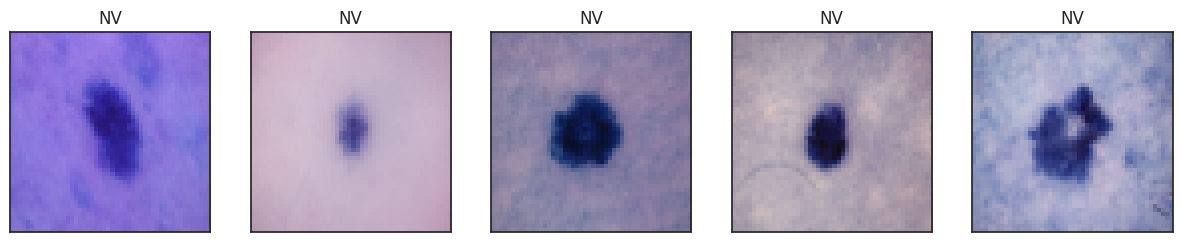

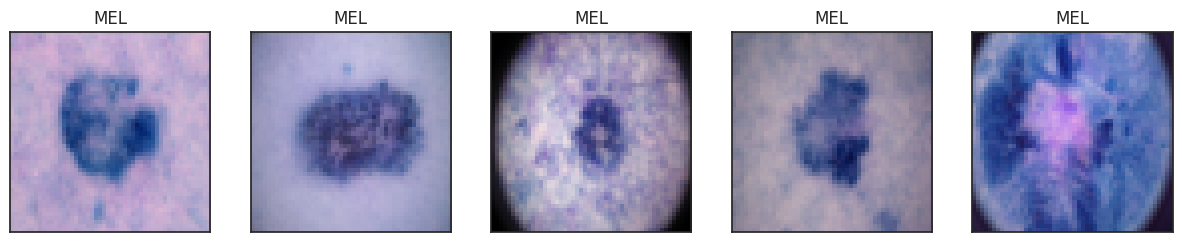

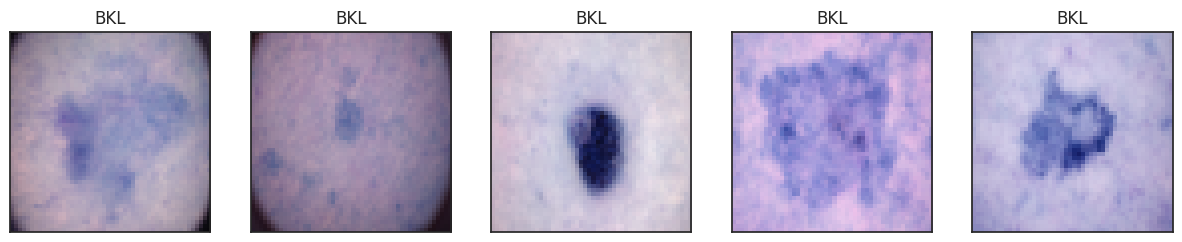

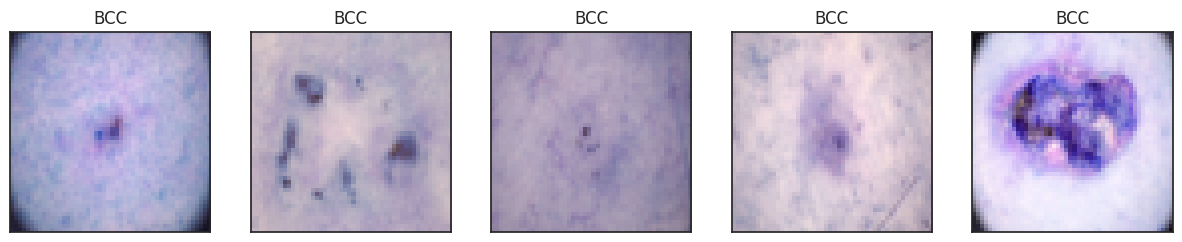

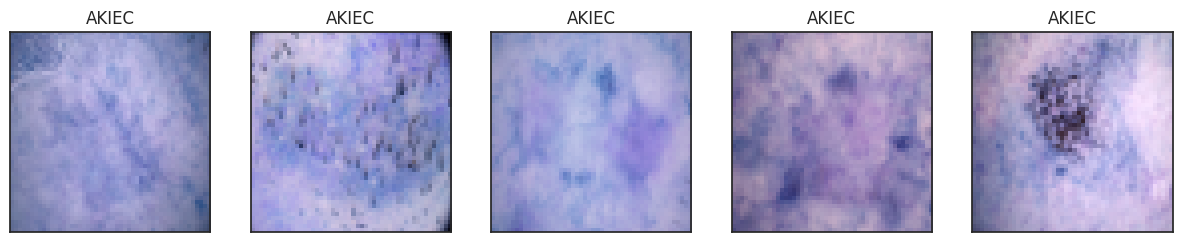

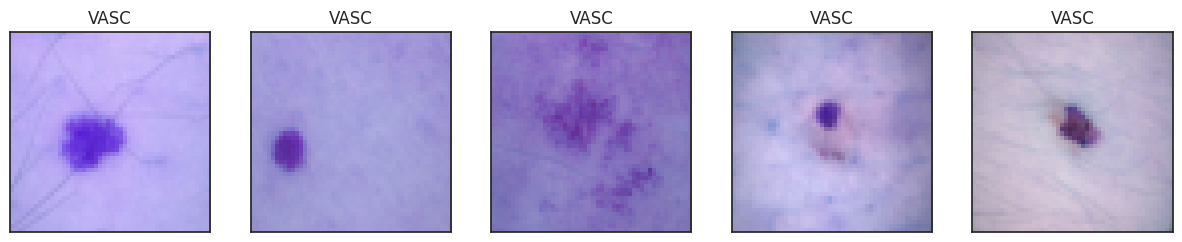

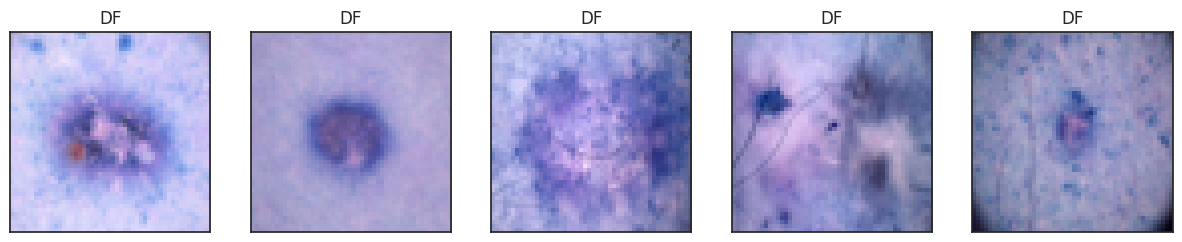

In [12]:
uni_labels=[]
for label in range(len(or_labels)):
  if or_labels[label] not in uni_labels:
    uni_labels.append(or_labels[label])
# print(uni_labels)


for uni in uni_labels:
  ls=[]
  for label in range(len(or_labels)):
    if or_labels[label] == uni:
      ls.append(label)
  ls =  random.choices(population=ls, k=5)

  plt.figure(figsize=(15,5))
  for i in range(1,6):
    plt.subplot(1,5,i)
    plt.imshow(org_data[ls[i-1]])
    plt.title(uni.upper())
    plt.xticks([])
    plt.yticks([])



In [13]:
data = []
labels = []

for index in range(len(or_data)):
  resize_img = or_data[index]
  dx = or_labels[index]
  rotated90 = resize_img.rotate(90)
  blur = cv2.blur(np.array(resize_img),(10,10))
  data.append(np.array(resize_img))
  data.append(np.array(rotated90))
  data.append(np.array(blur))
  labels.append(dx)
  labels.append(dx)
  labels.append(dx)

data = np.array(data)
labels = np.array(labels)
# labels = [label[0] for label in labels.tolist()]
print('After Augmentaion')
print('Data : {} | labels : {}'.format(data.shape , len(labels)))

After Augmentaion
Data : (40251, 50, 50, 3) | labels : 40251


In [14]:
labelEncoder = preprocessing.LabelEncoder()

mapping_dict={}
labels = labelEncoder.fit_transform(labels)
le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
le_name_mapping

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

In [15]:
n = np.arange(data.shape[0])
np.random.shuffle(n)
data = data[n]
labels = labels[n]
data = data.astype(np.float32)
labels = labels.astype(np.int32)

In [16]:
train_x , test_x , train_y , test_y = train_test_split(data , labels , test_size = 0.3, stratify = labels)

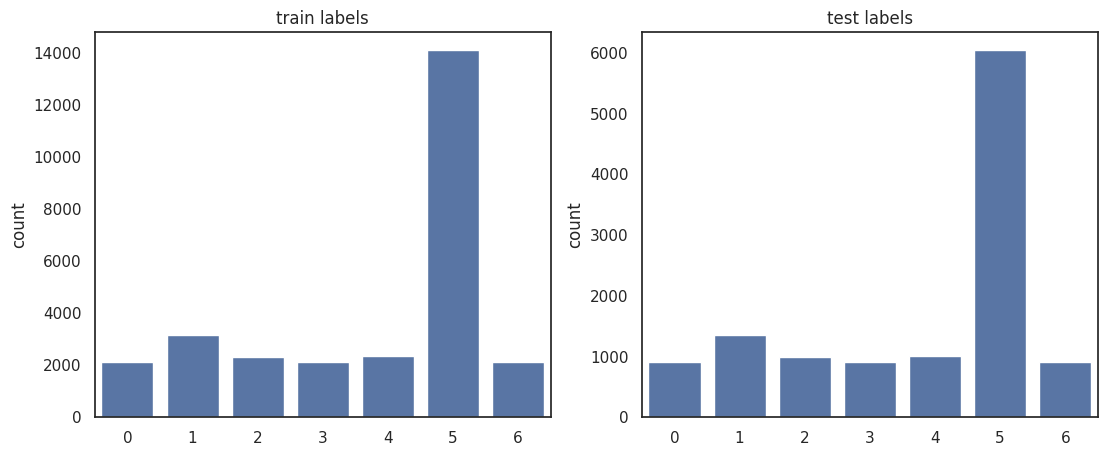

Y train shape (28175, 7)


In [18]:
plt.figure(1 , figsize = (20 ,5))
n = 0
for z , j in zip([train_y , test_y] , ['train labels', 'test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()


train_y=to_categorical(train_y,num_classes=7)
test_y=to_categorical(test_y,num_classes=7)

print("Y train shape",train_y.shape)

In [19]:
print('train data shape {} , test data shape {}'.format(train_x.shape, test_x.shape))

train data shape (28175, 50, 50, 3) , test data shape (12076, 50, 50, 3)


DenseNet

In [26]:
from tensorflow.keras.applications import DenseNet121
# Initialize the DenseNet121 model with pre-trained ImageNet weights
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

# Freeze all layers in the DenseNet121 model
for layer in densenet_base.layers:
    layer.trainable = False

In [27]:
# Create a new model on top of the pre-trained base model
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
densenet_model = Sequential([
    densenet_base,
    Flatten(),
    Dense(7, activation='softmax')
])

In [28]:
# Compile the model
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [29]:
# Define callbacks
checkpoint = ModelCheckpoint("densenet_model.h5", monitor="val_accuracy", verbose=1, save_best_only=True, save_weights_only=False, period=1)
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, verbose=1)

In [30]:
# Train the model
history_densenet = densenet_model.fit(train_x, train_y, batch_size=32, epochs=100,
                                      validation_data=(test_x, test_y), verbose=1)

Epoch 1/100
881/881 [==============================] - 42s 36ms/step - loss: 1.3370 - accuracy: 0.5636 - val_loss: 1.1750 - val_accuracy: 0.5650
Epoch 2/100
881/881 [==============================] - 21s 24ms/step - loss: 1.0738 - accuracy: 0.6216 - val_loss: 1.1538 - val_accuracy: 0.6110
Epoch 3/100
881/881 [==============================] - 22s 25ms/step - loss: 1.0058 - accuracy: 0.6375 - val_loss: 1.1324 - val_accuracy: 0.5890
Epoch 4/100
881/881 [==============================] - 21s 24ms/step - loss: 0.9788 - accuracy: 0.6491 - val_loss: 0.9998 - val_accuracy: 0.6572
Epoch 5/100
881/881 [==============================] - 21s 24ms/step - loss: 0.9356 - accuracy: 0.6628 - val_loss: 0.9359 - val_accuracy: 0.6650
Epoch 6/100
881/881 [==============================] - 22s 25ms/step - loss: 0.9252 - accuracy: 0.6663 - val_loss: 0.9757 - val_accuracy: 0.6507
Epoch 7/100
881/881 [==============================] - 22s 25ms/step - loss: 0.9118 - accuracy: 0.6714 - val_loss: 1.0773 - val_ac

In [31]:
# Extract values from history
values_densenet = history_densenet.history
validation_loss_densenet = values_densenet['val_loss']
validation_acc_densenet = values_densenet['val_accuracy']
training_acc_densenet = values_densenet['accuracy']
training_loss_densenet = values_densenet['loss']
epochs_densenet = range(1, len(training_acc_densenet) + 1)

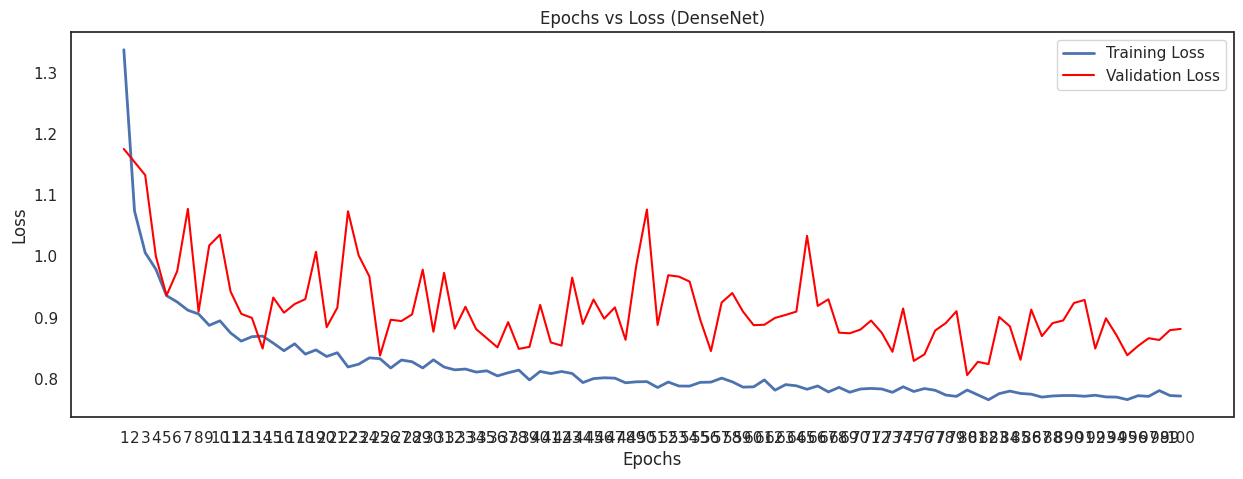

In [32]:
# Visualize overall model performance (Loss)
plt.figure(figsize=(15, 5))
plt.plot(epochs_densenet, training_loss_densenet, label='Training Loss', linewidth=2)
plt.plot(epochs_densenet, validation_loss_densenet, label='Validation Loss', color="red")
plt.title('Epochs vs Loss (DenseNet)')
plt.xlabel('Epochs')
plt.xticks(epochs_densenet)
plt.ylabel('Loss')
plt.legend()
plt.show()


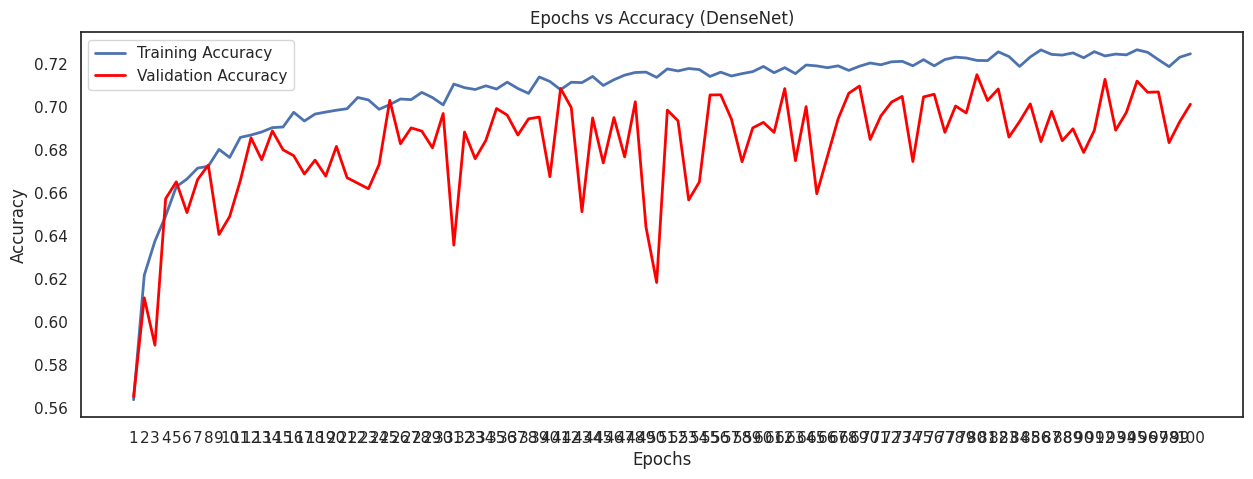

In [33]:
# Visualize overall model performance (Accuracy)
plt.figure(figsize=(15, 5))
plt.plot(epochs_densenet, training_acc_densenet, label='Training Accuracy', linewidth=2)
plt.plot(epochs_densenet, validation_acc_densenet, label='Validation Accuracy', color="red", linewidth=2)
plt.title('Epochs vs Accuracy (DenseNet)')
plt.xlabel('Epochs')
plt.xticks(epochs_densenet)
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
# Evaluate the model
loss_densenet, test_acc_densenet = densenet_model.evaluate(test_x, test_y)
test_acc_densenet = test_acc_densenet * 100
print('Test Loss score (DenseNet):', loss_densenet)
print('Test Accuracy (DenseNet):', test_acc_densenet)

378/378 [==============================] - 9s 24ms/step - loss: 0.8813 - accuracy: 0.7011
Test Loss score (DenseNet): 0.8812814354896545
Test Accuracy (DenseNet): 70.11427879333496


In [36]:
# Evaluate the model on train data
loss_train_densenet, train_acc_densenet = densenet_model.evaluate(train_x, train_y)
train_acc_densenet *= 100  # Convert train accuracy to percentage
print('Train Loss (DenseNet):', loss_train_densenet)
print('Train Accuracy (DenseNet):', train_acc_densenet)

# Evaluate the model on test data
loss_densenet, test_acc_densenet = densenet_model.evaluate(test_x, test_y)
test_acc_densenet *= 100  # Convert test accuracy to percentage
print('Test Loss (DenseNet):', loss_densenet)
print('Test Accuracy (DenseNet):', test_acc_densenet)


881/881 [==============================] - 19s 22ms/step - loss: 0.7423 - accuracy: 0.7380
Train Loss (DenseNet): 0.742278516292572
Train Accuracy (DenseNet): 73.79946708679199
378/378 [==============================] - 6s 15ms/step - loss: 0.8813 - accuracy: 0.7011
Test Loss (DenseNet): 0.8812814354896545
Test Accuracy (DenseNet): 70.11427879333496


In [38]:
# Print classification report and confusion matrix
target = ["NV","MEL", "BKL", "BCC", "AKIEC", "VASC", "DF"]
predictions_densenet = densenet_model.predict(test_x).round(0)
print("Classification Report (DenseNet): \n", classification_report(test_y, predictions_densenet, target_names=target))
print("Confusion Matrix (DenseNet):")
cm_densenet = confusion_matrix(np.argmax(test_y, axis=1), np.argmax(predictions_densenet, axis=1))
print(pd.DataFrame(cm_densenet, index=target, columns=target))

378/378 [==============================] - 11s 29ms/step
Classification Report (DenseNet): 
               precision    recall  f1-score   support

          NV       0.58      0.54      0.56       900
         MEL       0.68      0.48      0.56      1350
         BKL       0.63      0.08      0.14       989
         BCC       0.77      0.48      0.59       900
       AKIEC       0.43      0.34      0.38      1002
        VASC       0.85      0.82      0.83      6035
          DF       0.78      0.95      0.85       900

   micro avg       0.76      0.65      0.70     12076
   macro avg       0.67      0.53      0.56     12076
weighted avg       0.75      0.65      0.67     12076
 samples avg       0.65      0.65      0.65     12076

Confusion Matrix (DenseNet):
        NV  MEL  BKL  BCC  AKIEC  VASC   DF
NV     706   91    2    6     32    53   10
MEL    517  653    6   38     18    80   38
BKL    417   63   77   34    108   261   29
BCC    300   41    6  433      1   103   16
AKIEC  